In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train_original=train.copy() #to keep original files
test_original=test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns #name of clm in data

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

The test has 12 clms while train has 13 clm with target variable.

In [6]:
train.info() #to check data type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.shape,test.shape #rows and col of train and test

((614, 13), (367, 12))

Target variable : Loan_Status

<b>univariate analysis

In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

It has 422 yes and 192 No

In [9]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Here we got percentages of yes and no has yes is 69% and no is 31%

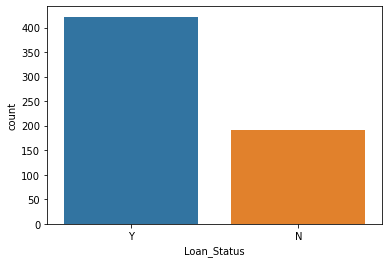

In [10]:
sns.countplot(train['Loan_Status'])

From 614 the loan apprived for 422 that is 69 %.

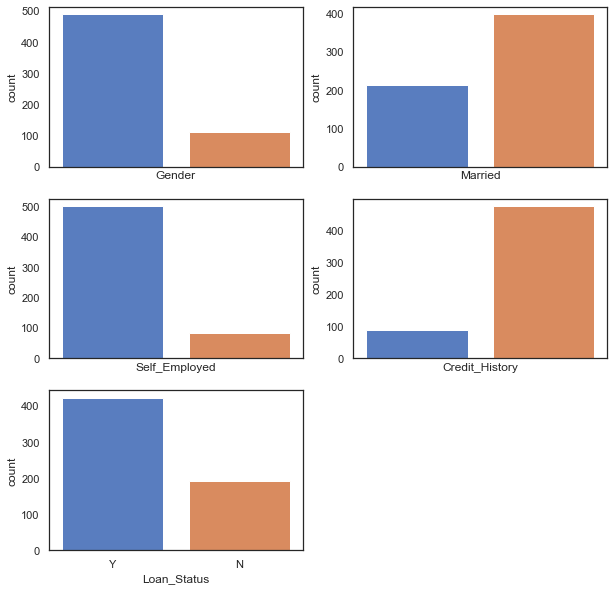

In [11]:
#for ordinal data visualization:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=True)
sns.countplot(train['Gender'],ax=axes[0,0])
sns.countplot(train['Married'],ax=axes[0,1])
sns.countplot(train['Self_Employed'],ax=axes[1,0])
sns.countplot(train['Credit_History'],ax=axes[1,1])
sns.countplot(train['Loan_Status'],ax=axes[2,0])
f.show()
f.delaxes(axes[2,1])

In [12]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


we can see gender has 80% male.
65% are married.
15% are selfemployed.

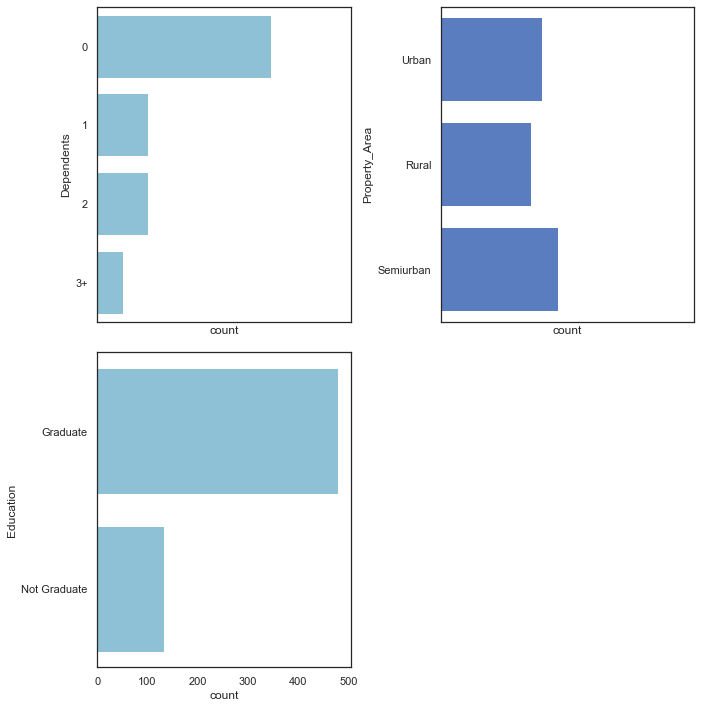

In [13]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.countplot(y="Dependents", data=train, color="c",ax=axes[0,0])
sns.countplot(y="Property_Area", data=train, color="b",ax=axes[0,1])
sns.countplot(y="Education", data=train, color="c",ax=axes[1,0])
f.tight_layout()
f.delaxes(axes[1,1])

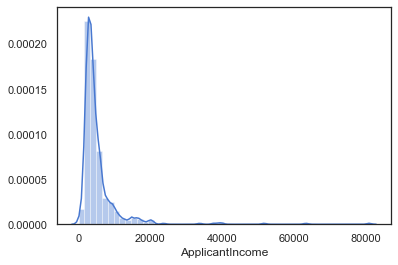

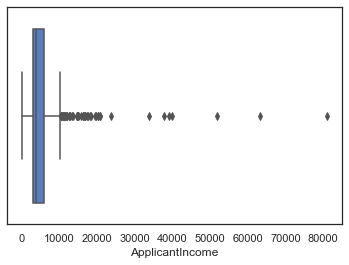

In [14]:
#numerical variable:
sns.distplot(train['ApplicantIncome'])
plt.show()
sns.boxplot(train['ApplicantIncome'])
plt.show()

Application has right skewed data and have lots of outliers.The data is not normal.

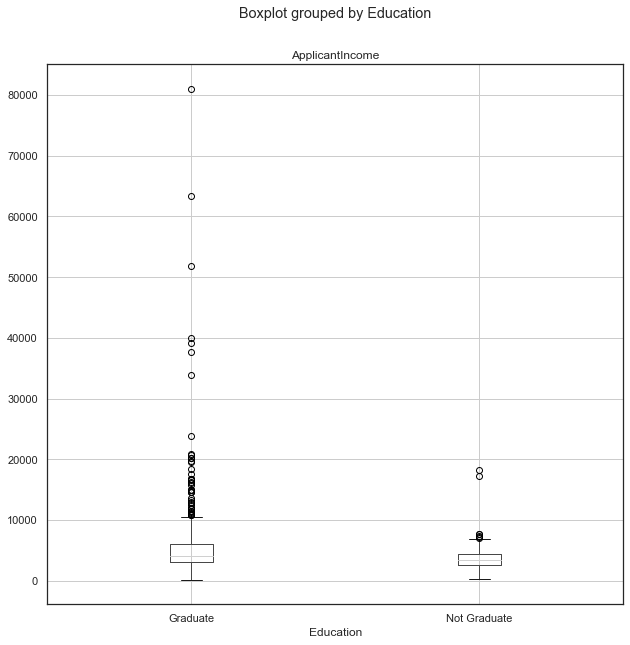

In [15]:
train.boxplot(column='ApplicantIncome',by='Education',figsize=(10,10))
f.show()

graduates has more outliers than not graduates that means graduates has more salary/income so appearing as outliers.

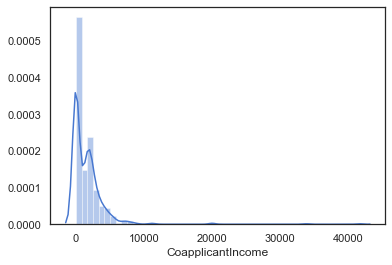

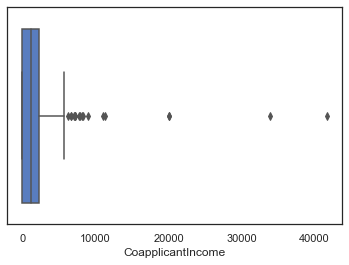

In [16]:
#numerical variable:
sns.distplot(train['CoapplicantIncome'])
plt.show()
sns.boxplot(train['CoapplicantIncome'])
plt.show()

data is not normal it is right skewed and has less outliers than above data.Not normally distributed

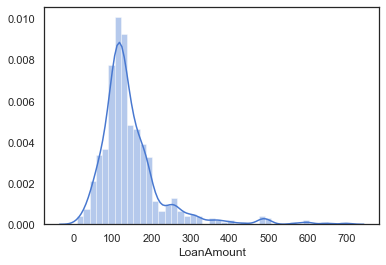

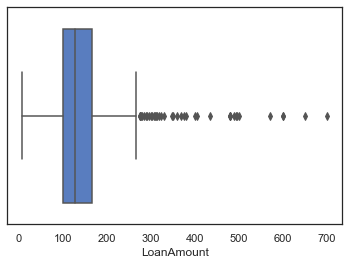

In [17]:
#numerical variable:
sns.distplot(train['LoanAmount'])
plt.show()
sns.boxplot(train['LoanAmount'])
plt.show()

data is not normal and has right skewed and has outliers.data is not normal.Most data is between 100 to 300

<b>Bivariate data analysis

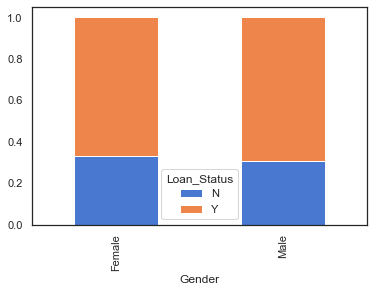

In [18]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

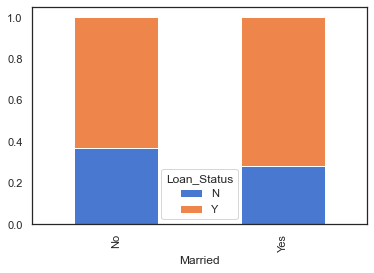

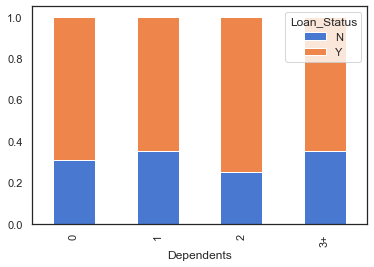

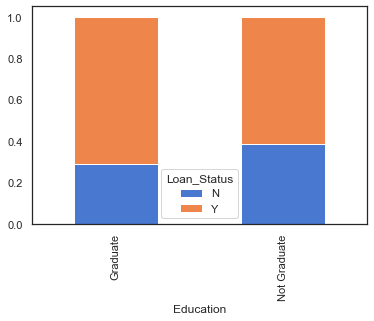

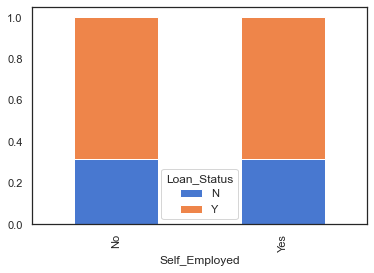

In [19]:
married=pd.crosstab(train['Married'],train['Loan_Status'])
married.div(married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()
dependant=pd.crosstab(train['Dependents'],train['Loan_Status'])
dependant.div(dependant.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()
education=pd.crosstab(train['Education'],train['Loan_Status'])
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()
self_employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
self_employed.div(self_employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

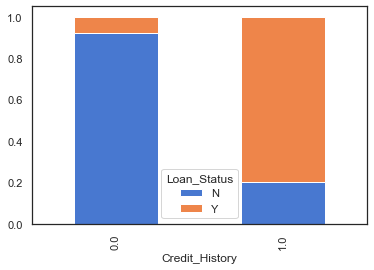

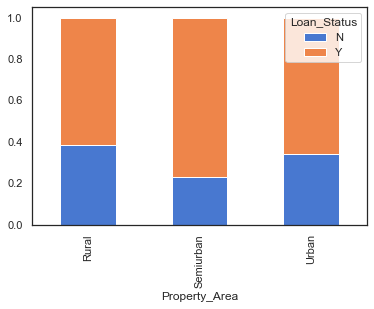

In [20]:
credit_history=pd.crosstab(train['Credit_History'],train['Loan_Status'])
credit_history.div(credit_history.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()
Property_area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_area.div(Property_area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

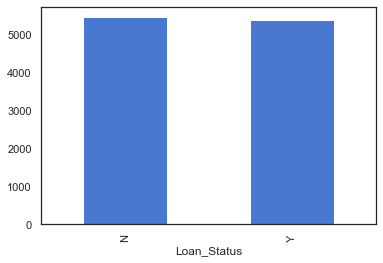

In [21]:
train.groupby(['Loan_Status'])['ApplicantIncome'].mean().plot.bar()

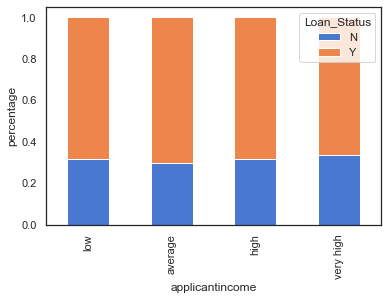

In [22]:
bins=[0,2500,4000,6000,81000]
group=['low','average','high','very high']
train['Income bin']=pd.cut(train['ApplicantIncome'],bins=bins,labels=group)
income_bin=pd.crosstab(train['Income bin'],train['Loan_Status'])
income_bin.div(income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel("applicantincome")
plt.ylabel("percentage")
plt.show()

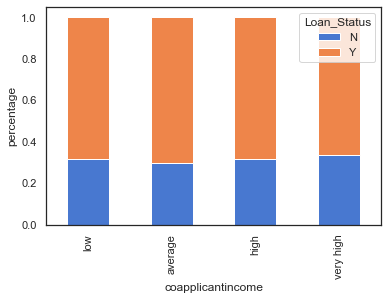

In [23]:
#for co applicants
bins=[0,1000,3000,42000]
group=['low','average','high']
train['coIncome bin']=pd.cut(train['CoapplicantIncome'],bins=bins,labels=group)
co_income_bin=pd.crosstab(train['Income bin'],train['Loan_Status'])
co_income_bin.div(co_income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel("coapplicantincome")
plt.ylabel("percentage")
plt.show()

In [24]:
train['total income']=train['ApplicantIncome']+train['CoapplicantIncome']

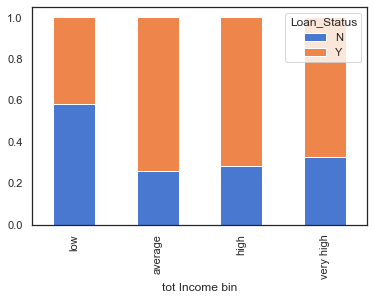

In [25]:
#for combination of applicant and co applicant income
bins=[0,2500,3000,6000,81000]
group=['low','average','high','very high']
train['tot Income bin']=pd.cut(train['total income'],bins=bins,labels=group)
tot_income_bin=pd.crosstab(train['tot Income bin'],train['Loan_Status'])
tot_income_bin.div(tot_income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

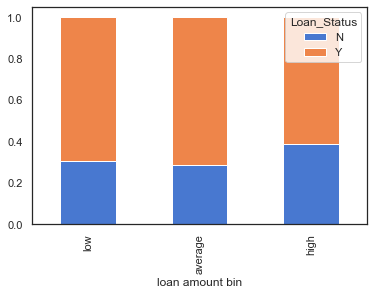

In [26]:
#for Loan amount
bins=[0,100,200,700]
group=['low','average','high']
train['loan amount bin']=pd.cut(train['LoanAmount'],bins=bins,labels=group)
loan_amount_bin=pd.crosstab(train['loan amount bin'],train['Loan_Status'])
loan_amount_bin.div(loan_amount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

In [27]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income bin', 'coIncome bin', 'total income', 'tot Income bin',
       'loan amount bin'],
      dtype='object')

In [28]:
train=train.drop(['Income bin','coIncome bin', 'total income', 'tot Income bin', 'loan amount bin'],axis=1)

In [29]:
train[train['Dependents']=='3+'] #3+ with 3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
61,LP001206,Male,Yes,3+,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
74,LP001253,Male,Yes,3+,Graduate,Yes,5266,1774.0,187.0,360.0,1.0,Semiurban,Y
78,LP001263,Male,Yes,3+,Graduate,No,3167,4000.0,180.0,300.0,0.0,Semiurban,N
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
109,LP001384,Male,Yes,3+,Not Graduate,No,2071,754.0,94.0,480.0,1.0,Semiurban,Y
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y


In [30]:
train['Dependents'].replace('3+',3,inplace=True)

In [31]:
test['Dependents'].replace('3+',3,inplace=True)

In [32]:
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

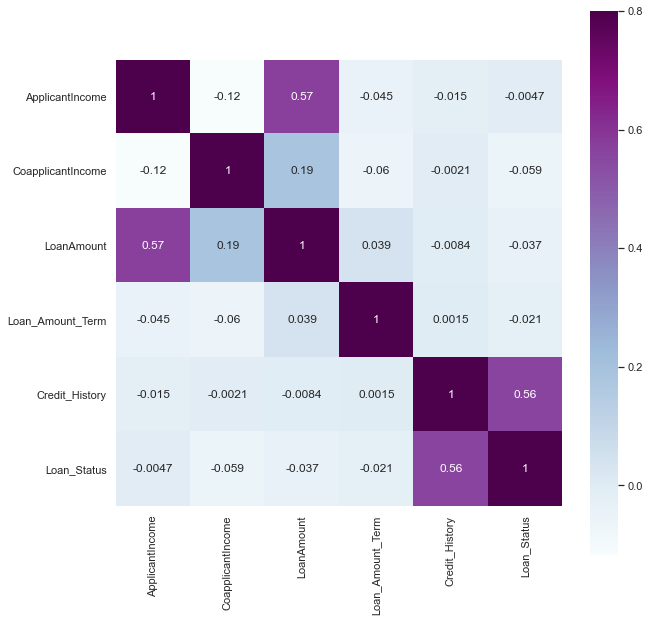

In [33]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(train.corr(),annot=True,vmax=.8,square=True,cmap="BuPu")

In [34]:
train.isna().sum()   #checking null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [36]:
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

In [37]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

In [38]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [39]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [40]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [41]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True) #360 is repating many times

In [42]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [43]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [44]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [45]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
#360 is repating many times

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [47]:
#loanamount has outliers
train['LoanAmount log']=np.log(train['LoanAmount'])

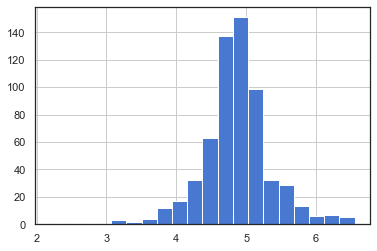

In [48]:
train['LoanAmount log'].hist(bins=20)

In [49]:
test['LoanAmount log']=np.log(test['LoanAmount'])

In [50]:
train=train.drop(['Loan_ID'],axis=1)
test=test.drop(['Loan_ID'],axis=1)

In [51]:
X=train.drop(['Loan_Status'],axis=1)   #dependant variable
y=train['Loan_Status']                  #traget variable

In [52]:
#converting categorical variables in dummy variables
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [53]:
from sklearn.model_selection import train_test_split  #importing train test split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3) #splitting data in test and train

In [55]:
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.metrics import accuracy_score  # for accuracy score 

In [56]:
model=LogisticRegression() 
model.fit(x_train,y_train)

LogisticRegression()

In [57]:
ypred=model.predict(x_test) #predicted y_test

In [58]:
accuracy_score(y_test,ypred) #accuracy score 

0.8378378378378378

In [59]:
ypredtest=model.predict(test)

In [60]:
from sklearn.model_selection import StratifiedKFold

In [61]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xval=X.loc[train_index],X.loc[test_index]
    ytr,yval=y.loc[train_index],y.loc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xval)
    score=accuracy_score(yval,pred_test)
    print("accuracy score",score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xval)[:,1]
    


1 of kfold5
accuracy score 0.8048780487804879

2 of kfold5
accuracy score 0.8373983739837398

3 of kfold5
accuracy score 0.7804878048780488

4 of kfold5
accuracy score 0.7886178861788617

5 of kfold5
accuracy score 0.7950819672131147


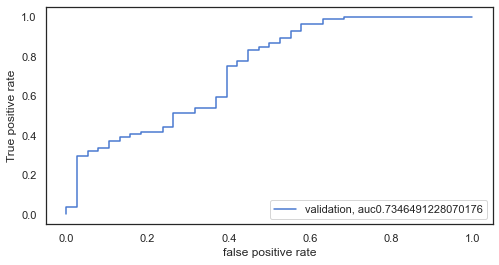

In [62]:
from sklearn import metrics 
fpr,tpr,_=metrics.roc_curve(yval,pred)
auc=metrics.roc_auc_score(yval,pred)
plt.figure(figsize=(8,4))
plt.plot(fpr,tpr,label='validation, auc'+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

Here i got auc value 0.73

In [63]:
train['TotalIncome']=train['ApplicantIncome']+train['CoapplicantIncome']

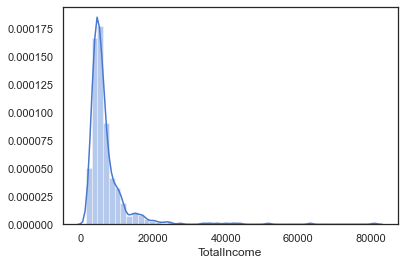

In [64]:
sns.distplot(train['TotalIncome'])

In [65]:
train['TotalIncomelog']=np.log(train['TotalIncome'])

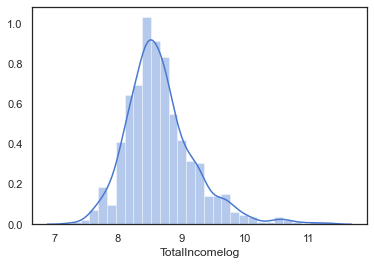

In [66]:
sns.distplot(train['TotalIncomelog'])

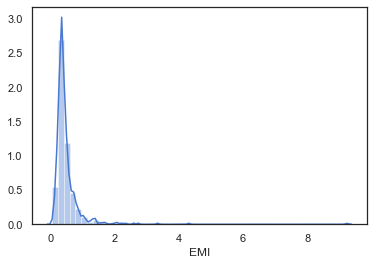

In [67]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
sns.distplot(train['EMI'])

In [68]:
x=train.drop(['LoanAmount'],axis=1)

In [69]:
y=train.Loan_Status

Logistic Regression

In [70]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xval=X.loc[train_index],X.loc[test_index]
    ytr,yval=y.loc[train_index],y.loc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xval)
    score=accuracy_score(yval,pred_test)
    print("accuracy score",score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xval)[:,1]
    


1 of kfold5
accuracy score 0.8048780487804879

2 of kfold5
accuracy score 0.8373983739837398

3 of kfold5
accuracy score 0.7804878048780488

4 of kfold5
accuracy score 0.7886178861788617

5 of kfold5
accuracy score 0.7950819672131147


Decision tree

In [71]:
from sklearn import tree

In [72]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xval=X.loc[train_index],X.loc[test_index]
    ytr,yval=y.loc[train_index],y.loc[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xval)
    score=accuracy_score(yval,pred_test)
    print("accuracy score",score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xval)[:,1]
    


1 of kfold5
accuracy score 0.6991869918699187

2 of kfold5
accuracy score 0.7398373983739838

3 of kfold5
accuracy score 0.7154471544715447

4 of kfold5
accuracy score 0.7235772357723578

5 of kfold5
accuracy score 0.6721311475409836


Random Forest 

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xval=X.loc[train_index],X.loc[test_index]
    ytr,yval=y.loc[train_index],y.loc[test_index]
    model=RandomForestClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xval)
    score=accuracy_score(yval,pred_test)
    print("accuracy score",score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xval)[:,1]
    


1 of kfold5
accuracy score 0.8048780487804879

2 of kfold5
accuracy score 0.8130081300813008

3 of kfold5
accuracy score 0.7967479674796748

4 of kfold5
accuracy score 0.7886178861788617

5 of kfold5
accuracy score 0.7377049180327869


We can improve the accuracy by tunning the hyperparameter by using gridsearch.

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
paramgrid={'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [79]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [80]:
GridSearchCV(cv=None,error_score='raise',estimator=RandomForestClassifier(bootstrap=True,class_weight=None,criterion='gini',
                                                                          max_depth=None,max_features='auto',max_leaf_nodes=None,
                                                                         min_impurity_decrease=0.0,min_impurity_split=None,
                                                                         min_samples_leaf=1,min_samples_split=2,
                                                                          min_weight_fraction_leaf=0.0,n_estimators=10,
                                                                         n_jobs=1,oob_score=False,random_state=1,verbose=0,
                                                                          warm_start=False),iid=True,n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]},pre_dispatch='2*n_jobs',refit=True,return_train_score='warn',scoring=None,
             verbose=0)

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=1,
                                              random_state=1),
             iid=True, n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]},
             return_train_score='warn')

In [81]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=41, random_state=1)

In [82]:
RandomForestClassifier(bootstrap=True,class_weight=None,criterion='gini',
                                                                          max_depth=7,max_features='auto',max_leaf_nodes=None,
                                                                         min_impurity_decrease=0.0,min_impurity_split=None,
                                                                         min_samples_leaf=1,min_samples_split=2,
                                                                          min_weight_fraction_leaf=0.0,n_estimators=41,
                                                                         n_jobs=1,oob_score=False,random_state=1,verbose=0,
                                                                          warm_start=False)

RandomForestClassifier(max_depth=7, n_estimators=41, n_jobs=1, random_state=1)

In [83]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xval=X.loc[train_index],X.loc[test_index]
    ytr,yval=y.loc[train_index],y.loc[test_index]
    model=RandomForestClassifier(random_state=1,n_estimators=41,max_depth=7)
    model.fit(xtr,ytr)
    pred_test=model.predict(xval)
    score=accuracy_score(yval,pred_test)
    print("accuracy score",score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xval)[:,1]
    


1 of kfold5
accuracy score 0.8130081300813008

2 of kfold5
accuracy score 0.8455284552845529

3 of kfold5
accuracy score 0.7967479674796748

4 of kfold5
accuracy score 0.8048780487804879

5 of kfold5
accuracy score 0.7868852459016393


accuracy--81%

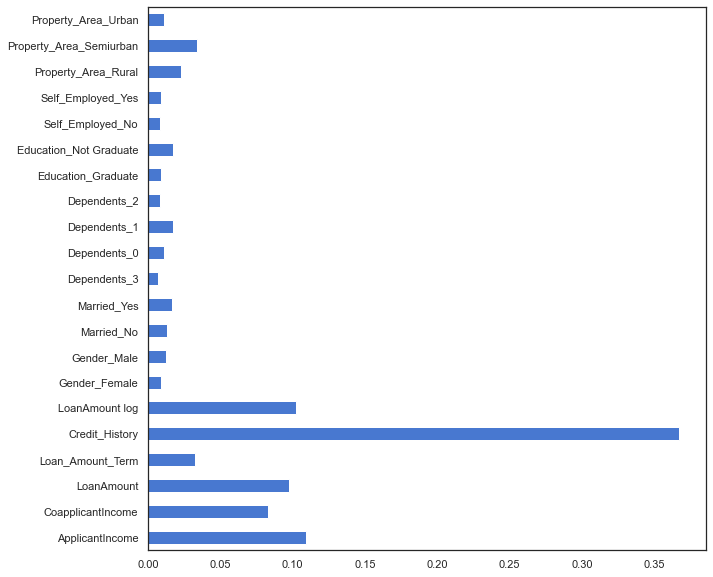

In [84]:
importance=pd.Series(model.feature_importances_,index=X.columns)
importance.plot(kind='barh',figsize=(10,10))

Credit history is most important feature for predicting the loan status

XGboost

In [85]:
#pip install xgboost

In [86]:
from xgboost import XGBClassifier

In [87]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xval=X.loc[train_index],X.loc[test_index]
    ytr,yval=y.loc[train_index],y.loc[test_index]
    model=XGBClassifier(n_estimators=50,max_depth=7)
    model.fit(xtr,ytr)
    pred_test=model.predict(xval)
    score=accuracy_score(yval,pred_test)
    print("accuracy score",score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xval)[:,1]
    


1 of kfold5
accuracy score 0.7967479674796748

2 of kfold5
accuracy score 0.7804878048780488

3 of kfold5
accuracy score 0.7967479674796748

4 of kfold5
accuracy score 0.7398373983739838

5 of kfold5
accuracy score 0.7213114754098361


78% accuracy